In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

seed = 999
np.random.seed(seed)
tf.random.set_seed(seed)

# BMI 데이터 다진분류
- 특성 : 키, 몸무게
- 라벨 : 3개 클래스(fat, normal, thin)

In [2]:
bmi = pd.read_csv("./DATA/bmi.csv")
bmi.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [3]:
X = bmi.drop("label",axis=1)
y = bmi['label']
X.shape, y.shape

((20000, 2), (20000,))

In [4]:
y_en = pd.get_dummies(y)
y_en

,fat,normal,thin
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
19995,True,False,False
19996,False,True,False
19997,False,True,False
19998,False,True,False


In [6]:
m1 = Sequential()
m1.add(Dense(units=12,input_dim=2,activation="sigmoid"))
m1.add(Dense(units=6,activation="sigmoid"))
m1.add(Dense(units=3,activation="softmax"))
m1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135 (540.00 B)

 Trainable params: 135 (540.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
m1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
h1 = m1.fit(X,y_en,batch_size=16,epochs=50)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 667us/step - accuracy: 0.5379 - loss: 0.9738
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7691 - loss: 0.6139
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7845 - loss: 0.5127
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7912 - loss: 0.4765
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.7981 - loss: 0.4525
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8073 - loss: 0.4286
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8179 - loss: 0.3990
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8396 - loss: 0.3589
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.8698 - loss: 0.3148
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.8946 - loss: 0.2783
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9118 - loss: 0.2491
Epoch 12

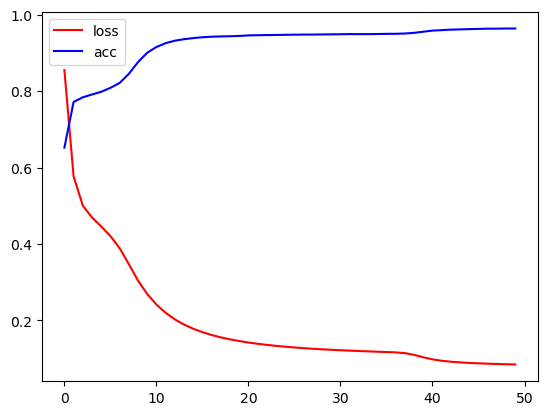

In [8]:
plt.plot(h1.history["loss"],color='r',label="loss")
plt.plot(h1.history["accuracy"],color='b',label="acc")
plt.legend()
plt.show()

In [23]:
X_test = np.array([[180,67]])
label = ["fat","normal","thin"]

pred = m1.predict(X_test)
print(pred)
print(label[pred.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[8.9203631e-06 9.9960953e-01 3.8152357e-04]]
normal


- sonar 데이터를 이용한 이진분류
    - 과적합 평가를 위해 훈련/검증 데이터로 분리
    - sonar 음파를 암석의 다양한 방향으로 쐈을때 반사되어 오는 값 데이터

    - 208개로 구성
    - 60개의 특성 - 0과 1사이의 값
    - 2개의 라벨(금속(M),암석(R))

In [38]:
sonar = pd.read_csv("./DATA/sonar.csv",header=None)

In [42]:
X = sonar.iloc[:,:-1]
y = sonar.iloc[:,-1]
X.shape,y.shape

((208, 60), (208,))

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y_en = encoder.transform(y)
y_en.shape

(208,)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y_en,test_size=0.2)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((166, 60), (42, 60), (166,), (42,))

In [59]:
m2 = Sequential()
m2.add(Dense(units=128,input_dim=60,activation="sigmoid"))
m2.add(Dense(units=64,activation="sigmoid"))
m2.add(Dense(units=32,activation="sigmoid"))
m2.add(Dense(units=16,activation="sigmoid"))
m2.add(Dense(units=1,activation="sigmoid"))
m2.summary()

c:\Users\SMHRD\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
m2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# validation_data : 검증데이터가 있는경우
# validation_split : 검증데이터가 없는 경우, 훈련 데이터에서 비율만큼 검증데이터로 사용(0.3이하 사용)
h2 = m2.fit(X_train,y_train,batch_size=16,validation_data=[X_val,y_val],epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5368 - loss: 0.7062 - val_accuracy: 0.5476 - val_loss: 0.6892
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5368 - loss: 0.6924 - val_accuracy: 0.5476 - val_loss: 0.6893
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5368 - loss: 0.6919 - val_accuracy: 0.5476 - val_loss: 0.6915
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5355 - loss: 0.6929 - val_accuracy: 0.5476 - val_loss: 0.6919
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5593 - loss: 0.6928 - val_accuracy: 0.5476 - val_loss: 0.6912
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5368 - loss: 0.6922 - val_accuracy: 0.5476 - val_loss: 0.6905
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5368 - loss: 0.6916 - val_accuracy: 0.5476 - val_loss: 0.6900
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5368 - loss: 0.6913 - val_accuracy: 0.5476 - 

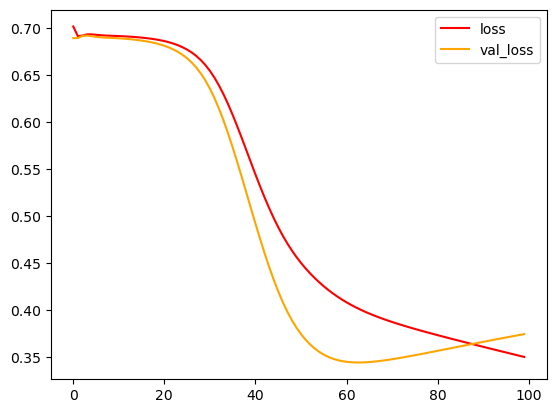

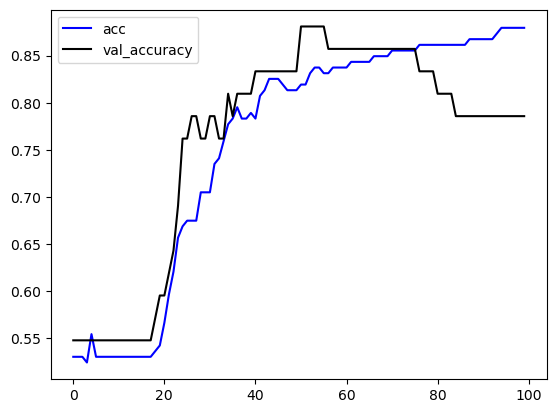

In [63]:
plt.plot(h2.history["loss"],color='r',label="loss")
plt.plot(h2.history["val_loss"],color="orange",label="val_loss")
plt.legend()
plt.show()
plt.plot(h2.history["accuracy"],color='b',label="acc")
plt.plot(h2.history["val_accuracy"],color="black",label="val_accuracy")
plt.legend()
plt.show()

- 과소/과대 적합 분석
    - 훈련 >>> 검증 : 과대적합
    - 훈련 < 검증 : 과소적합
    - 훈련, 검증 낮은 경우 : 과소적합
- 과소 적합 발생 원인
    - 훈련 횟수(epochs)가 작은 경우
    - 데이터가 부족한 경우
    - 특성 수가 적은 경우
- 과대 적합 발생 원인
    - 훈련 횟수(epochs)가 많은 경우
    - 데이터가 부족한 경우
    - 특성 수가 많은 경우(신경망이 복잡한 경우)